In [3]:
from scipy.io import arff
import pandas as pd
from pyod.models.mo_gaal import MO_GAAL
from pyod.models.lof import LOF
from pyod.models.knn import KNN
from pyod.models.anogan import AnoGAN
from sklearn import metrics
import tensorflow as tf
import numpy as np
import random

In [4]:
class CustomData():
    def __init__(self, path):
        arff_data = arff.loadarff(path)
        df = pd.DataFrame(arff_data[0])
        df["outlier"] = pd.factorize(df["outlier"], sort=True)[0]
        
        self.data = df.iloc[:,:-2]
        self.ground_truth = df.iloc[:,-1]
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, i):
        return self.data[i]
        
def AUC(truth, decision):
    print("AUC: " + str(metrics.roc_auc_score(truth, decision)))

In [5]:
seed = 666
tf.keras.utils.set_random_seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)
np.random.default_rng(seed)

Generator(PCG64) at 0x1C55BA36E40

In [6]:
arrythmia_path = "./Resources/Datasets/Arrhythmia_withoutdupl_norm_02_v01.arff"
wave_path = "./Resources/Datasets/Waveform_withoutdupl_norm_v01.arff"
internet_ads_path = "./Resources/Datasets/InternetAds_withoutdupl_norm_02_v01.arff"

dataset = CustomData(arrythmia_path)

In [ ]:
mogaal_model = MO_GAAL(lr_d=0.01, lr_g=0.01, stop_epochs=50)
mogaal_model.fit(dataset.data)

In [ ]:
decision_values = mogaal_model.decision_function(dataset.data)
AUC(dataset.ground_truth, decision_values)

In [ ]:
lof_model = LOF()
lof_model.fit(dataset.data)

In [ ]:
decision_values = lof_model.decision_function(dataset.data)
AUC(dataset.ground_truth, decision_values)

In [ ]:
knn_model = KNN()
knn_model.fit(dataset.data)

In [ ]:
decision_values = knn_model.decision_function(dataset.data)
AUC(dataset.ground_truth, decision_values)

In [7]:
anogan_model = AnoGAN()
anogan_model.fit(dataset.data)

AnoGAN(D_layers=[20, 10, 5], G_layers=[20, 10, 3, 10, 20],
    activation_hidden='tanh', batch_size=32, contamination=0.1,
    dropout_rate=0.2, epochs=500, epochs_query=20,
    index_D_layer_for_recon_error=1, latent_dim_G=2, learning_rate=0.001,
    learning_rate_query=0.01, output_activation=None, preprocessing=False,
    verbose=0)

AUC: 0.7633196721311475


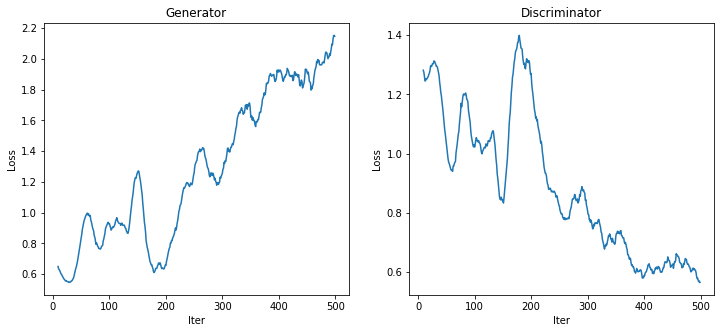

In [8]:
decision_values = anogan_model.decision_function(dataset.data)
AUC(dataset.ground_truth, decision_values)
anogan_model.plot_learning_curves()